# General description

The content of our group is the COVID-19 board. After the task division of the group, I need to explore the data related to COVID-19 deaths in Scotland. I think it is imperative to raise awareness of those who have been infected. Only by using data to learn more about them can we better target them for their own characteristics and help them recover, rather than allowing the disease to progress to death.

I have 4 table type files, which are "daily_sex_ageGroup_2.csv "" deaths_confirmate.csv "" icu_confirmate.csv" and "hospital_confirmate.csv".

The first file, "daily_sex_ageGroup_2.csv," is complicated, so I'll analyze it multiple times from different perspectives. The remaining three files have a relatively simple structure, so I'm going to put them together for comparative analysis.

Because the data I was responsible for centered on deaths, I focused my research on patients already infected with the novel coronavirus. Next, I hope to explore the overall situation of the number of infected persons and deaths. Whether age, sex, and time have any influence on the number of infections and deaths caused by COVID-19, as well as the overall situation of patients after infection.

# First set of data

In [34]:
import pandas as pd
data = pd.read_csv("daily_sex_agegroup_2.csv")
data

Date     Sex  AgeGroup  DailyPositive  CumulativePositive  \
0      2020/2/28  Female   0 to 14              0                   0   
1      2020/2/28  Female   0 to 59              0                   0   
2      2020/2/28  Female  15 to 19              0                   0   
3      2020/2/28  Female  20 to 24              0                   0   
4      2020/2/28  Female  25 to 44              0                   0   
...          ...     ...       ...            ...                 ...   
17517  2021/8/11   Total       60+             14               54988   
17518  2021/8/11   Total  65 to 74              4               16605   
17519  2021/8/11   Total  75 to 84              3               12510   
17520  2021/8/11   Total    85plus              0                9647   
17521  2021/8/11   Total     Total             68              359442   

       CrudeRatePositive  DailyDeaths  CumulativeDeaths  CrudeRateDeaths  \
0               0.000000            0                 0         0.000000   
1               0.000000            0                 0         0.000000   
2               0.000000            0                 0         0.000000   
3               0.000000            0                 0         0.000000   
4               0.000000            0                 0         0.000000   
...                  ...          ...               ...              ...   
17517        3903.598412            0              7467       530.082370   
17518        2832.346575            0              1407       239.994678   
17519        3663.186006            0              2614       765.433111   
17520        7518.451263            0              3069      2391.844815   
17521        6575.960483            0              8021       146.743505   

       CumulativeNegative  CrudeRateNegative  
0                      31           7.396644  
1                     281          13.783692  
2                       9           6.525853  
3                      35          20.777309  
4                     108          14.940570  
...                   ...                ...  
17517              478149       33943.800050  
17518              174809       29817.505110  
17519              119757       35067.319460  
17520               63128       49199.211290  
17521             2195529       40167.014270  

[17522 rows x 11 columns]

1. Table Description：

17522 rows × 11 columns.
The 8 columns in this table are sex, age group, daily positive, Cumulative positive, crude Rate positive, Daily Deaths, cumulative Deaths, Crude rate Death, Cumulative negative, crude rate negative. The data in this table is from February 28, 2020 to August 11, 2021. There are three categories in the gender label: women, men and total. And there are 11 age groups in the age group label.

2. Data cleaning：

in the age label, the groups 0 to 59 and 60+ overlap with other age groups and are therefore removed.

In [35]:
data.drop(data[(data['AgeGroup']  == '0 to 59') | (data['AgeGroup']  == '60+')].index, inplace = True)
data

Date     Sex  AgeGroup  DailyPositive  CumulativePositive  \
0      2020/2/28  Female   0 to 14              0                   0   
2      2020/2/28  Female  15 to 19              0                   0   
3      2020/2/28  Female  20 to 24              0                   0   
4      2020/2/28  Female  25 to 44              0                   0   
5      2020/2/28  Female  45 to 64              0                   0   
...          ...     ...       ...            ...                 ...   
17516  2021/8/11   Total  45 to 64             19               88940   
17518  2021/8/11   Total  65 to 74              4               16605   
17519  2021/8/11   Total  75 to 84              3               12510   
17520  2021/8/11   Total    85plus              0                9647   
17521  2021/8/11   Total     Total             68              359442   

       CrudeRatePositive  DailyDeaths  CumulativeDeaths  CrudeRateDeaths  \
0               0.000000            0                 0         0.000000   
2               0.000000            0                 0         0.000000   
3               0.000000            0                 0         0.000000   
4               0.000000            0                 0         0.000000   
5               0.000000            0                 0         0.000000   
...                  ...          ...               ...              ...   
17516        5949.362855            0               843        56.389846   
17518        2832.346575            0              1407       239.994678   
17519        3663.186006            0              2614       765.433111   
17520        7518.451263            0              3069      2391.844815   
17521        6575.960483            0              8021       146.743505   

       CumulativeNegative  CrudeRateNegative  
0                      31           7.396644  
2                       9           6.525853  
3                      35          20.777309  
4                     108          14.940570  
5                     130          16.835671  
...                   ...                ...  
17516              560015       37460.450180  
17518              174809       29817.505110  
17519              119757       35067.319460  
17520               63128       49199.211290  
17521             2195529       40167.014270  

[14336 rows x 11 columns]

3. Graphs

First, I want to take a macro look at the correlation between cumulative deaths and cumulative positives from February 2020 to August 2021.

Since there is a detailed breakdown of gender in the data, I decided to label the chart with male and female labels. There are currently three categories of gender labels, female, male and total, so I decided to take the total out before setting up gender labels.

I think it's good to use a scatter plot, because we can see the distribution in detail.

In [36]:
data.drop(data[(data['Sex']  == 'Total')].index, inplace = True)
data

Date     Sex  AgeGroup  DailyPositive  CumulativePositive  \
0      2020/2/28  Female   0 to 14              0                   0   
2      2020/2/28  Female  15 to 19              0                   0   
3      2020/2/28  Female  20 to 24              0                   0   
4      2020/2/28  Female  25 to 44              0                   0   
5      2020/2/28  Female  45 to 64              0                   0   
...          ...     ...       ...            ...                 ...   
17505  2021/8/11    Male  45 to 64             11               41260   
17507  2021/8/11    Male  65 to 74              2                8477   
17508  2021/8/11    Male  75 to 84              3                5744   
17509  2021/8/11    Male    85plus              0                3187   
17510  2021/8/11    Male     Total             38              171502   

       CrudeRatePositive  DailyDeaths  CumulativeDeaths  CrudeRateDeaths  \
0               0.000000            0                 0         0.000000   
2               0.000000            0                 0         0.000000   
3               0.000000            0                 0         0.000000   
4               0.000000            0                 0         0.000000   
5               0.000000            0                 0         0.000000   
...                  ...          ...               ...              ...   
17505        5708.514347            0               502        69.454052   
17507        3022.760743            0               849       302.739633   
17508        3842.757366            0              1494       999.491557   
17509        6945.473565            0              1311      2857.080591   
17510        6434.835203            0              4207       157.848606   

       CumulativeNegative  CrudeRateNegative  
0                      31           7.396644  
2                       9           6.525853  
3                      35          20.777309  
4                     108          14.940570  
5                     130          16.835671  
...                   ...                ...  
17505              245944       34027.504910  
17507               85128       30355.264420  
17508               54789       36654.044800  
17509               22239       48465.762980  
17510             1005272       37718.275320  

[9557 rows x 11 columns]

In [37]:
# Check to see if there are only male and female categories in the sex tab.
sex = data.groupby('Sex').size()
sex

Sex
Female    4779
Male      4778
dtype: int64

In [38]:
# Calculate the maximum, minimum and average values of daily COVID-19 positive numbers
data_max = data['DailyPositive'].max()
print('The maximum daily positive count was', data_max)
data_mix = data['DailyPositive'].min()
print('The minimum daily positive count was',data_mix)
data_mean = data['DailyPositive'].mean()
print('The average daily positive count was',data_mean)
# Calculate the maximum, minimum and average number of daily COVID-19 deaths
data_max = data['DailyDeaths'].max()
print('The maximum daily deaths count was',data_max)
data_mix = data['DailyDeaths'].min()
print('The minimum daily deaths count was',data_mix)
data_mean = data['DailyDeaths'].mean()
print('The average daily deaths count was',data_mean)

The maximum daily positive count was 2087
The minimum daily positive count was 0
The average daily positive count was 75.04038924348644
The maximum daily deaths count was 42
The minimum daily deaths count was 0
The average daily deaths count was 1.6785602176415193


<Figure size 2160x720 with 0 Axes>

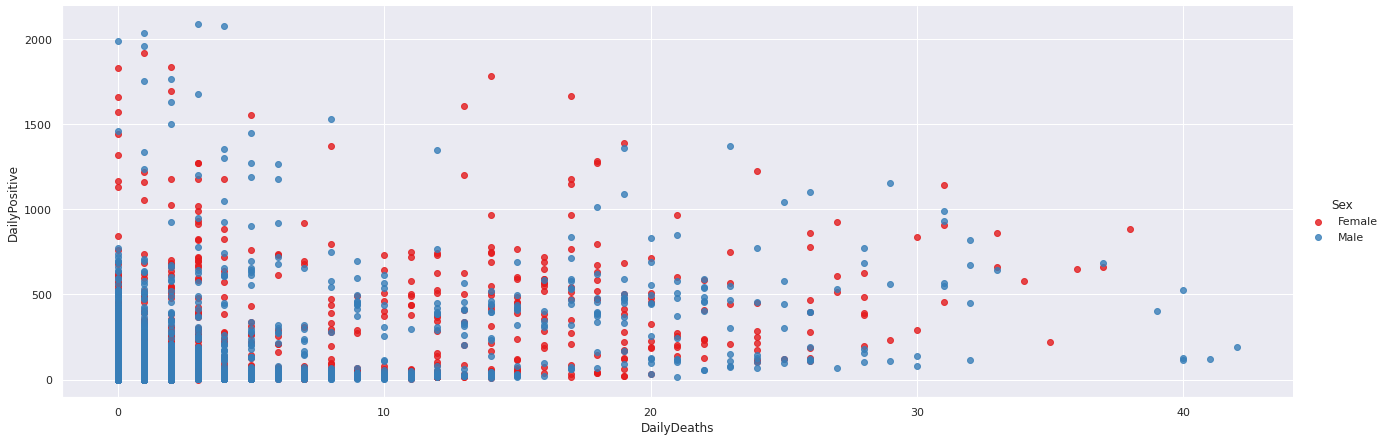

In [39]:
# Scatter diagram
# The purpose of using scatter plots is to get an overview of the daily number of new positive patients and the number of deaths in order to determine the situation of COVID-19 patients of different genders
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.figure(figsize = (30,10))
sns.lmplot( x="DailyDeaths", y="DailyPositive",height = 6, aspect =  3, data=data, fit_reg=False, hue='Sex', legend=True, palette="Set1")
plt.show()

According to the scatter chart, from the perspective of patient status, the number of new positive patients per day is mostly less than 1000, and the number of deaths per day is mostly less than 30. Combined with my previous calculation of the average number of infections and deaths, neither daily infections nor daily deaths are not optimistic. So we still need to inform people in Scotland about the situation and get everyone to take it seriously.

From the perspective of gender, the data distribution of male and female is similar, so we can speculate that gender has little impact on novel Coronavirus, and we do not need to pay special attention to specific gender. In addition, both the largest daily number of positive patients and the largest daily number of deaths were higher in males than in females. But based on this, we can't conclude that men are more likely to get infected or die, perhaps because of some social or personality factors, such as men being less protective, or men being more active in public places.

Boxplot no. 1


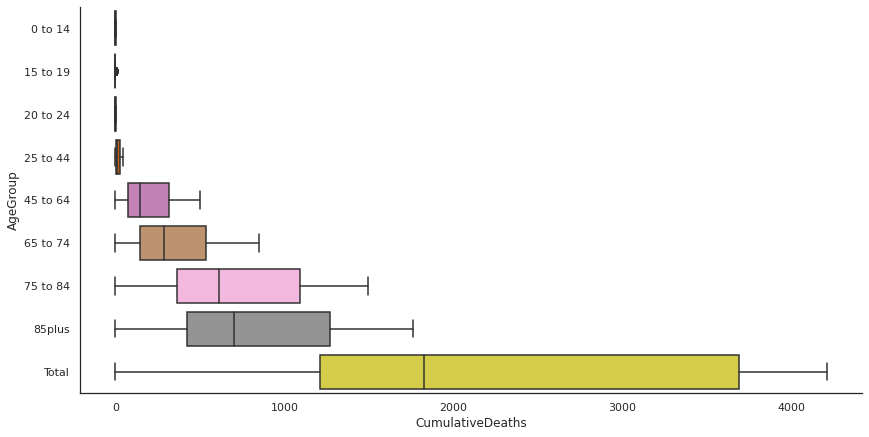

In [40]:
# Boxplot no. 1
# The purpose of using boxplot is to explore whether there is a difference in the risk of death in different age groups, and to intuitively see their maximum, minimum and average values.
print( 'Boxplot no. 1' )
sns.set(palette = 'colorblind',style='white')
plot = sns.catplot(x='CumulativeDeaths',y='AgeGroup',kind='box',data=data,height = 6, aspect =  2,)

Boxplot no. 2


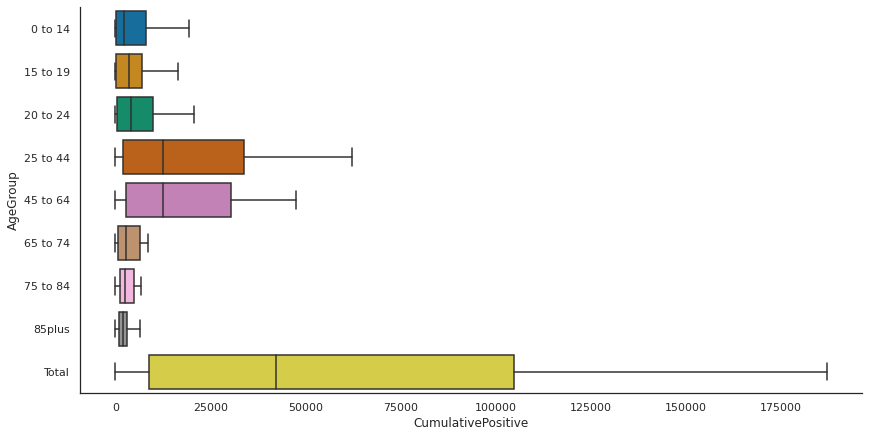

In [41]:
# Boxplot no. 2
print( 'Boxplot no. 2' )
sns.set(palette = 'colorblind',style='white')
plot = sns.catplot(x='CumulativePositive',y='AgeGroup',kind='box',data=data,height = 6, aspect =  2,)

As can be seen from the boxplot no. 1 above, the number of deaths of COVID-19 patients in different age groups varies greatly. From young children to the elderly, the cumulative number of deaths is increasing, especially among those aged 45 to over 85. However, it can be seen from the no. 2 boxplot that the majority of infected people are mainly concentrated in the middle-aged people between 25 and 64 years old, while the elderly over 65 years old are less. Combined with the above two boxplot, we can infer that although young and middle-aged people are prone to infection with Novel coronavirus, they are also prone to recovery. But older people are more likely to die if they get infected.

In [42]:
# To see if there was a relationship between the month and the number of cumulative deaths.
# To make the table more intuitive, first remove columns that are not relevant to this problem
data=data.drop(labels=['Sex',"AgeGroup","DailyPositive","CumulativePositive","CrudeRatePositive","DailyDeaths","CrudeRateDeaths","CumulativeNegative","CrudeRateNegative"],axis=1) 
data

Date  CumulativeDeaths
0      2020/2/28                 0
2      2020/2/28                 0
3      2020/2/28                 0
4      2020/2/28                 0
5      2020/2/28                 0
...          ...               ...
17505  2021/8/11               502
17507  2021/8/11               849
17508  2021/8/11              1494
17509  2021/8/11              1311
17510  2021/8/11              4207

[9557 rows x 2 columns]

In [43]:
# getting necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# getting the data
data['month'] = pd.to_datetime(data['Date']).dt.month # we store the month in a separate column
month_dict = {1: 'january',
              2: 'february',
              3: 'march',
              4: 'april',
              5: 'may',
              6: 'june',
              7: 'july',
              8: 'august',
              9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'}

# create a 'month' column
data['month'] = data['month'].map(month_dict)
# generate a pd.Serie with the mean cumulative deaths for each month (used later for colors in the FacetGrid plot), and create a new column in temp dataframe
month_mean_serie = data.groupby('month')['CumulativeDeaths'].mean()
data['mean_month'] = data['month'].map(month_mean_serie)
data

Date  CumulativeDeaths     month  mean_month
0      2020/2/28                 0  february  735.862709
2      2020/2/28                 0  february  735.862709
3      2020/2/28                 0  february  735.862709
4      2020/2/28                 0  february  735.862709
5      2020/2/28                 0  february  735.862709
...          ...               ...       ...         ...
17505  2021/8/11               502    august  442.288360
17507  2021/8/11               849    august  442.288360
17508  2021/8/11              1494    august  442.288360
17509  2021/8/11              1311    august  442.288360
17510  2021/8/11              4207    august  442.288360

[9557 rows x 4 columns]

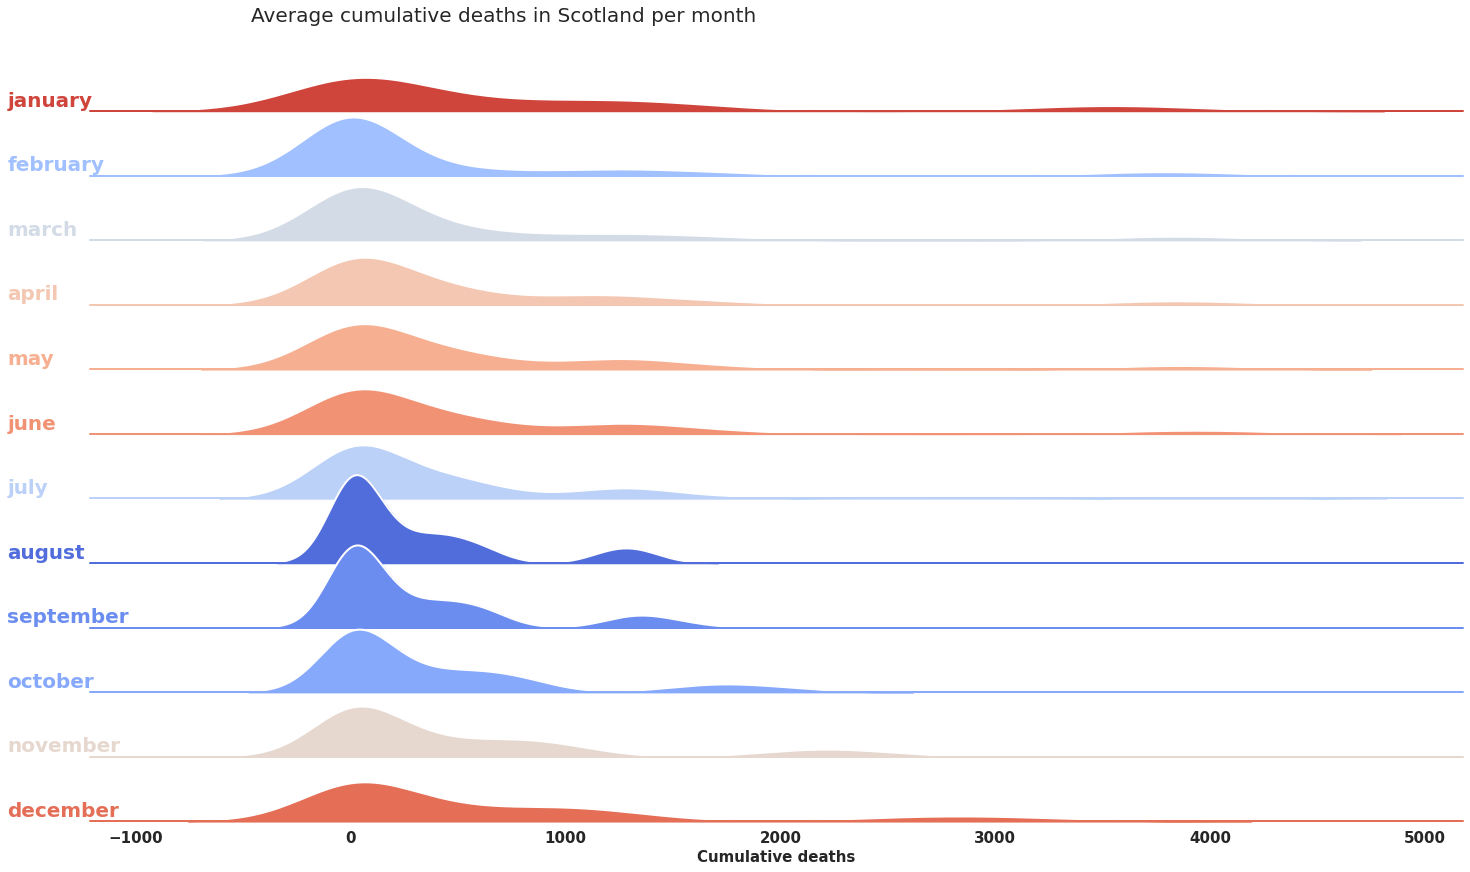

In [44]:
# Ridgeline graph
pal = sns.color_palette(palette='coolwarm', n_colors=12)
g = sns.FacetGrid(data, row='month', hue='mean_month', aspect=20, height=1, palette=pal)
g.map(sns.kdeplot, 'CumulativeDeaths',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, 'CumulativeDeaths', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

for i, ax in enumerate(g.axes.flat):
    ax.text(-1600,0.0001, month_dict[i+1],
            fontweight='bold', fontsize=20,
            color=ax.lines[-1].get_color())    
g.fig.subplots_adjust(hspace=-0.3)

g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Cumulative deaths', fontweight='bold', fontsize=15)
g.fig.suptitle('Average cumulative deaths in Scotland per month',
               ha='right',
               fontsize=20,
               fontweight=20)
plt.show()

As can be seen from the Ridgeline chart, there is no significant difference in the average number of deaths per month, so we need to pay attention to the progress of patients throughout the year.

However, there were slightly more deaths in the fall and winter than in the spring and summer, so I decided to explore the COVID-19 patients in the fall and winter in more detail.

I found hospital patient and death records for Scotland between September 2020 and January 2021 from the data provider, and I decided to compare them.

# Second set of data

In [45]:
#Import three files about the number of hospitalized patients, the number of ICU patients, and the number of deaths
import pandas as pd
data1 = pd.read_csv("deaths_confirmed.csv")
print(data1.head())
data2 = pd.read_csv("icu_confirmed.csv")
print(data2.head())
data3 = pd.read_csv("hospital_confirmed.csv")
print(data3.head())

        date  deaths
0  2020/9/11    2499
1  2020/9/12    2499
2  2020/9/13    2499
3  2020/9/14    2499
4  2020/9/15    2500
        date  ICU
0  2020/9/11    6
1  2020/9/12    7
2  2020/9/13    6
3  2020/9/14    6
4  2020/9/15    6
        date  hospital
0  2020/9/11        45
1  2020/9/12        42
2  2020/9/13        45
3  2020/9/14        51
4  2020/9/15        48


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2056

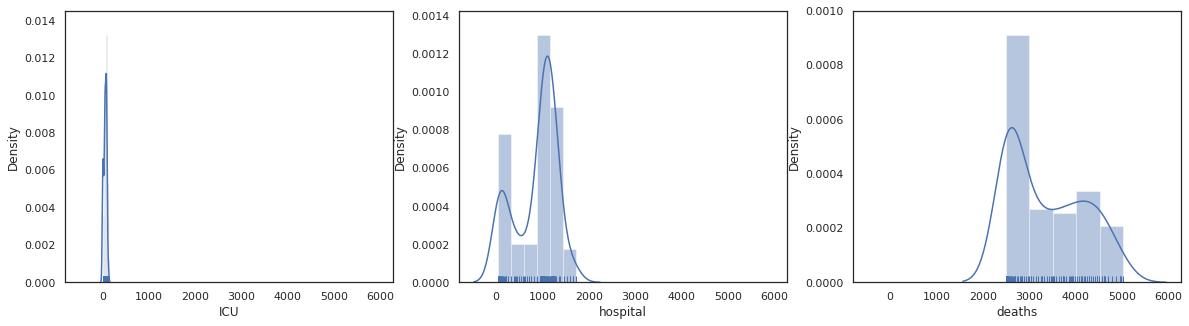

In [46]:
#Histogram & Kernel Density Estimation 
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
# set a grey background 
sns.set(style="darkgrid")
sns.load_dataset("iris")
sns.distplot( data2["ICU"] , kde=True, rug=True, ax=axes[0])    
sns.distplot( data3["hospital"] , kde=True, rug=True, ax=axes[1])  
sns.distplot( data1['deaths'] , kde=True, rug=True, ax=axes[2])  
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


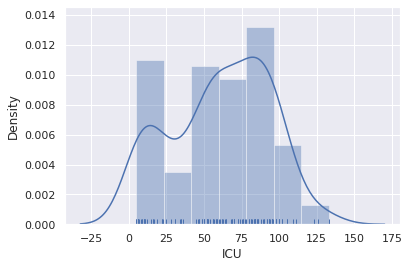

In [47]:
# In order to see more details, I have shown the ICU chart separately again
sns.set(style="darkgrid")
sns.load_dataset("iris")
sns.distplot(data2["ICU"], kde=True, rug=True)
plt.show()

The Histogram charts above include number of hospitalized patients, number of ICU patients, and number of deaths. As can be seen from the charts above, the number of new coronavirus patients in hospitals is below 2,000 per day, the number of ICU patients is below 150, but the number of deaths is around 2,000 to 5,000. 

It is assumed that many COVID-19 patients are staying at home or nursing homes instead of being treated in hospitals. Perhaps these patients don't take their illness seriously enough, or perhaps they have limited medical resources, which ultimately make them sicker and die.

The next step is to prove my conjecture with the following data files on where COVID-19 patients died.
I regard the following document data analysis as part of my future work.

In [48]:
# the file relate to where COVID-19 patients died
location_data2 = pd.read_csv("location_type_week_covid_related_deaths.csv")
print(location_data22.head())

  week commencing  Care Home  Home / Non-institution  Hospital  \
0      2020-03-16          1                       2         8   
1      2020-03-23          5                      14        43   
2      2020-03-30         49                      39       193   
3      2020-04-06        189                      64       357   
4      2020-04-13        303                      37       311   

   Other institution  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0  


# Summarize my reflections and assumptions

My data can help future patients infected with the novel coronavirus get more attention and help them with targeted measures. Here I present three hypotheses based on the chart.

Hypothesis 1: Gender has no significant effect on infection and death.
Chart basis: According to the scatter chart, the data distribution of male and female is similar.
Test method: Several similar data files from other parts of the UK were randomly selected for comparison to verify that sex had no significant effect on infections and deaths, excluding the chance of Scotland's data.

Hypothesis 2: Different age groups differ greatly in the performance of infected and dead people, thus the health of the body determines the risk of death. The elderly are more difficult to recover, while the young are easier to recover.
Chart basis: According to the boxplot, the older the person, the more deaths. Older people have fewer infections but more deaths.
Test method: To interview medical staff about whether the death of the elderly was due to weakened immune systems or other chronic diseases.

Hypothesis 3: Many COVID-19 patients prefer self-isolation after infection rather than going to hospital, which may indirectly lead to the death of some patients with weak resistance without timely treatment.
Chart basis: Histogram charts show huge differences in the number of hospitalized patients, ICU patients and deaths. The number of deaths is much higher than the first two.
Test method: Data on places of death were imported and compared to see whether patients in self-isolation died more often than those treated in hospital.